In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import random

In [2]:
import tensorflow as tf
import numpy as np

from sklearn.model_selection import train_test_split

import matplotlib.ticker as ticker
import matplotlib.pyplot as plt

import time
import re
import os
import io

In [3]:
%config InlineBackend.figure_format = 'retina'
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager.findfont(font)

print("완료!")

완료!


In [4]:
def fix_random_seeds(seed=42):
    # Python random 시드 고정
    random.seed(seed)
    # NumPy random 시드 고정
    np.random.seed(seed)
    # TensorFlow random 시드 고정
    tf.random.set_seed(seed)
    # CuDNN 사용 시 비결정적 동작 방지를 위한 옵션 (원하는 경우 주석 해제)
    # tf.config.experimental.enable_op_determinism()

fix_random_seeds(42)
print("Random 시드 고정 완료!")

Random 시드 고정 완료!


In [5]:
enc_train_data = 'korean-english-park.train.ko'
dec_train_data = 'korean-english-park.train.en'
enc_val_data = 'korean-english-park.dev.ko'
dec_val_data = 'korean-english-park.dev.en'
enc_test_data = 'korean-english-park.test.ko'
dec_test_data = 'korean-english-park.test.en'
enc_file_path = 'korean-english-sampled.ko'
dec_file_path = 'korean-english-sampled.en'

# 데이터 읽기
def load_data(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        data = file.readlines()
    return data

# 파일 읽기
enc_train_data = load_data(enc_train_data)
dec_train_data = load_data(dec_train_data)
enc_val_data = load_data(enc_val_data)
dec_val_data = load_data(dec_val_data)
enc_test_data = load_data(enc_test_data)
dec_test_data = load_data(dec_test_data)
enc_data = load_data(enc_file_path)
dec_data = load_data(dec_file_path)

# 데이터 미리 보기
print(enc_train_data[:3])  # 첫 3개 항목 확인

['개인용 컴퓨터 사용의 상당 부분은 "이것보다 뛰어날 수 있느냐?"\n', '모든 광마우스와 마찬가지 로 이 광마우스도 책상 위에 놓는 마우스 패드를 필요로 하지 않는다.\n', '그러나 이것은 또한 책상도 필요로 하지 않는다.\n']


In [6]:
enc_data = enc_train_data + enc_val_data
dec_data = dec_train_data + dec_val_data

In [7]:
enc_lengths = [len(sentence.split()) for sentence in enc_data]
dec_lengths = [len(sentence.split()) for sentence in dec_data]

enc_95 = int(np.percentile(enc_lengths, 95))
dec_95 = int(np.percentile(dec_lengths, 95))

enc_95, dec_95

(26, 39)

In [8]:
len(enc_train_data)

94123

In [9]:
len(enc_val_data)

1000

In [10]:
# 특수기호 확인하는 함수
def find_special_char(data):
    # 한글과 숫자를 제외한 특수문자만 찾는 정규표현식
    pattern = r'[^가-힣0-9a-zA-Z\s]'
    
    special_chars = []
    
    # 리스트의 각 항목에 대해 특수기호를 찾음
    for text in data:
        if isinstance(text, str):  # 문자열인 경우에만 처리
            # 정규표현식을 통해 특수문자 추출
            special_chars.extend(re.findall(pattern, text))
    
    return special_chars

In [11]:
set(find_special_char(enc_data))

{'!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '=',
 '>',
 '?',
 '@',
 '[',
 ']',
 '^',
 '_',
 '`',
 '{',
 '}',
 '~',
 '±',
 '²',
 '´',
 '·',
 '×',
 'é',
 '˙',
 '˝',
 '–',
 '―',
 '‘',
 '’',
 '“',
 '”',
 '•',
 '‥',
 '…',
 '℃',
 'ℓ',
 '▲',
 '▶',
 '〈',
 '〉',
 '〔',
 '〕',
 'い',
 'か',
 'き',
 'く',
 'さ',
 'ざ',
 'し',
 'す',
 'そ',
 'て',
 'と',
 'ば',
 'ぶ',
 'ぷ',
 'ま',
 'や',
 'よ',
 'ら',
 'り',
 'ん',
 'ㄴ',
 'ㅇ',
 'ㅋ',
 'ㆍ',
 '㈜',
 '㎝',
 '㎞',
 '㎠',
 '㎡',
 '㎢',
 '㎾',
 '一',
 '万',
 '三',
 '上',
 '不',
 '丙',
 '中',
 '主',
 '之',
 '九',
 '亞',
 '交',
 '京',
 '仁',
 '代',
 '佛',
 '促',
 '信',
 '修',
 '假',
 '備',
 '傷',
 '像',
 '僞',
 '價',
 '億',
 '兆',
 '光',
 '克',
 '兒',
 '內',
 '全',
 '公',
 '兵',
 '再',
 '切',
 '前',
 '劉',
 '力',
 '加',
 '動',
 '勝',
 '北',
 '區',
 '卍',
 '占',
 '印',
 '卿',
 '反',
 '受',
 '古',
 '司',
 '吉',
 '同',
 '名',
 '吳',
 '吾',
 '命',
 '和',
 '品',
 '商',
 '善',
 '喩',
 '器',
 '四',
 '因',
 '國',
 '園',
 '圓',
 '團',
 '在',
 '地',
 '坤',
 '型',
 '城',
 '基',
 '堀',
 '報',
 '場',
 '塔',
 '墓',
 '壽'

In [12]:
set(find_special_char(dec_data))

{'!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '~',
 '¡',
 '¢',
 '£',
 '¥',
 '¦',
 '¨',
 '®',
 '¯',
 '°',
 '±',
 '´',
 'µ',
 '·',
 '¸',
 '¹',
 'º',
 '»',
 '½',
 '¾',
 '¿',
 'À',
 'Á',
 'Â',
 'Ç',
 'Ê',
 'Î',
 'Ï',
 'Ñ',
 'Ù',
 'Û',
 'â',
 'æ',
 'ç',
 'ñ',
 'ó',
 'ö',
 'ø',
 'û',
 '˝',
 '–',
 '—',
 '―',
 '‘',
 '’',
 '“',
 '”',
 '…',
 '℃',
 '∼'}

In [13]:
def preprocess_sentence(sentence, s_token=False, e_token=False):

    sentence = re.sub(r"([?.!,])", r" \1 ", sentence)
    sentence = re.sub(r'[" "]+', " ", sentence)
    sentence = re.sub(r"[^가-힣0-9a-zA-Z?.!,]+", " ", sentence)

    sentence = sentence.strip()

    if s_token:
        sentence = '<start> ' + sentence

    if e_token:
        sentence += ' <end>'
    
    return sentence

In [14]:
def fix_random_seeds(seed=42):
    # Python random 시드 고정
    random.seed(seed)
    # NumPy random 시드 고정
    np.random.seed(seed)
    # TensorFlow random 시드 고정
    tf.random.set_seed(seed)
    # CuDNN 사용 시 비결정적 동작을 피하기 위한 설정 (옵션)
    # tf.config.experimental.enable_op_determinism()

fix_random_seeds(42)
print("Random 시드 고정 완료!")

Random 시드 고정 완료!


In [15]:
enc_corpus = [] 
dec_corpus = []

num_examples = 30000

for kor in enc_data[:num_examples]:
    enc_corpus.append(preprocess_sentence(kor))
    
for eng in dec_data[:num_examples]:
    dec_corpus.append(preprocess_sentence(eng, s_token=True, e_token=True))

print("한국어:", enc_corpus[100])
print("영어:", dec_corpus[100])

한국어: 제 23차 연례 컴덱스 박람회의 개회사를 한 케이츠는 2년여전 기술 산업의 거품이 붕괴된 이후에 첨단 기술에 대해 부정적인 인식이 있다고 말했다 .
영어: <start> Gates , who opened the 23rd annual Comdex trade show , said there was a negative perception of high tech following the collapse of the tech bubble about two years ago . <end>


In [16]:
import nltk
import MeCab
import tensorflow as tf

In [17]:
nltk.download('punkt')
mecab = MeCab.Tagger()

[nltk_data] Downloading package punkt to /aiffel/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [18]:
KOR_MAX_LEN = 30  # 한국어 최대 길이
ENG_MAX_LEN = 40  # 영어 최대 길이

def tokenize(corpus, lang='ko'):
    tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='')
    tokenized_corpus = []
    
    for sentence in corpus:
        if lang == 'ko':  # 한국어 텍스트일 경우 MeCab 사용
            parsed = mecab.parse(sentence)
            # 'EOS'나 빈 줄 제외
            tokens = [line.split('\t')[0] for line in parsed.splitlines() if line and line != 'EOS']
        elif lang == 'en':  # 영어 텍스트일 경우 NLTK 사용
            tokens = nltk.word_tokenize(sentence)
        else:
            raise ValueError("Language should be either 'ko' or 'en'.")
        tokenized_corpus.append(' '.join(tokens))
    
    tokenizer.fit_on_texts(tokenized_corpus)
    # 특수 토큰 추가 (이미 전처리 시 추가한 경우에도 index 부여)
    tokenizer.word_index['<start>'] = len(tokenizer.word_index) + 1
    tokenizer.word_index['<end>'] = len(tokenizer.word_index) + 2

    tensor = tokenizer.texts_to_sequences(tokenized_corpus)
    # 언어별 최대 길이로 패딩
    max_len = KOR_MAX_LEN if lang == 'ko' else ENG_MAX_LEN
    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, maxlen=max_len, padding='post')
    return tensor, tokenizer

enc_tensor, enc_tokenizer = tokenize(enc_corpus, lang='ko')
dec_tensor, dec_tokenizer = tokenize(dec_corpus, lang='en')

print("한국어 텐서 shape:", enc_tensor.shape)
print("영어 텐서 shape:", dec_tensor.shape)

한국어 텐서 shape: (30000, 30)
영어 텐서 shape: (30000, 40)


In [19]:
enc_corpus, enc_tokenizer = tokenize(enc_corpus)
dec_corpus, dec_tokenizer = tokenize(dec_corpus, lang='en')

In [20]:
enc_train, enc_val, dec_train, dec_val = train_test_split(enc_corpus, dec_corpus, test_size=0.2)

In [21]:
class BahdanauAttention(tf.keras.layers.Layer):
    def __init__(self, units):
        super(BahdanauAttention, self).__init__()
        self.w_dec = tf.keras.layers.Dense(units)
        self.w_enc = tf.keras.layers.Dense(units)
        self.w_com = tf.keras.layers.Dense(1)
    
    def call(self, h_enc, h_dec):
        # h_enc shape: [batch x length x units]
        # h_dec shape: [batch x units]

        h_enc = self.w_enc(h_enc)
        h_dec = tf.expand_dims(h_dec, 1)
        h_dec = self.w_dec(h_dec)

        score = self.w_com(tf.nn.tanh(h_dec + h_enc))
        
        attn = tf.nn.softmax(score, axis=1)

        context_vec = attn * h_enc
        context_vec = tf.reduce_sum(context_vec, axis=1)

        return context_vec, attn

In [22]:
class Encoder(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim, enc_units):
        super(Encoder, self).__init__()
        
        self.enc_units = enc_units
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
        self.gru = tf.keras.layers.GRU(enc_units,
                                       return_sequences=True)
        
    def call(self, x):
        out = self.embedding(x)
        out = self.gru(out)
        
        return out

In [23]:
class Decoder(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim, dec_units):
        super(Decoder, self).__init__()
        self.dec_units = dec_units
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
        self.gru = tf.keras.layers.GRU(dec_units,
                                       return_sequences=True,
                                       return_state=True)
        self.fc = tf.keras.layers.Dense(vocab_size)

        self.attention = BahdanauAttention(self.dec_units)

    def call(self, x, h_dec, enc_out):
        context_vec, attn = self.attention(enc_out, h_dec)

        out = self.embedding(x)
        out = tf.concat([tf.expand_dims(context_vec, 1), out], axis=-1)
        
        out, h_dec = self.gru(out)
        out = tf.reshape(out, (-1, out.shape[2]))
        out = self.fc(out)

        return out, h_dec, attn

In [24]:
BATCH_SIZE     = 32
SRC_VOCAB_SIZE = len(enc_tokenizer.index_word) + 1
TGT_VOCAB_SIZE = len(dec_tokenizer.index_word) + 1

units         = 512
embedding_dim = 256

encoder = Encoder(SRC_VOCAB_SIZE, embedding_dim, units)
decoder = Decoder(TGT_VOCAB_SIZE, embedding_dim, units)

# sample input
sequence_len = 30

sample_enc = tf.random.uniform((BATCH_SIZE, sequence_len))
sample_output = encoder(sample_enc)

print ('Encoder Output:', sample_output.shape)

sample_state = tf.random.uniform((BATCH_SIZE, units))

sample_logits, h_dec, attn = decoder(tf.random.uniform((BATCH_SIZE, 1)),
                                     sample_state, sample_output)

print ('Decoder Output:', sample_logits.shape)
print ('Decoder Hidden State:', h_dec.shape)
print ('Attention:', attn.shape)

Encoder Output: (32, 30, 512)
Decoder Output: (32, 31385)
Decoder Hidden State: (32, 512)
Attention: (32, 30, 1)


In [25]:
optimizer = tf.keras.optimizers.Adam()
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')

def loss_function(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss = loss_object(real, pred)
    
    mask = tf.cast(mask, dtype=loss.dtype)
    loss *= mask
    
    return tf.reduce_mean(loss)

In [26]:
# 체크포인트 설정 (베스트 모델 저장)
def create_checkpoint_manager(encoder, decoder, optimizer, checkpoint_dir='./checkpoints'):
    checkpoint = tf.train.Checkpoint(optimizer=optimizer, encoder=encoder, decoder=decoder)
    manager = tf.train.CheckpointManager(checkpoint, checkpoint_dir, max_to_keep=1)
    return checkpoint, manager

In [27]:
from tqdm import tqdm
import random

In [28]:
@tf.function
def train_step(src, tgt, encoder, decoder, optimizer, dec_tok):
    bsz = src.shape[0]
    loss = 0

    with tf.GradientTape() as tape:
        enc_out = encoder(src)
        h_dec = enc_out[:, -1]
        
        dec_src = tf.expand_dims([dec_tok.word_index['<start>']] * bsz, 1)

        for t in range(1, tgt.shape[1]):
            pred, h_dec, _ = decoder(dec_src, h_dec, enc_out)

            loss += loss_function(tgt[:, t], pred)
            dec_src = tf.expand_dims(tgt[:, t], 1)
        
    batch_loss = (loss / int(tgt.shape[1]))

    variables = encoder.trainable_variables + decoder.trainable_variables
    gradients = tape.gradient(loss, variables)
    optimizer.apply_gradients(zip(gradients, variables))

    return batch_loss

In [29]:
# 체크포인트 설정
checkpoint_dir = './checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(optimizer=optimizer, encoder=encoder, decoder=decoder)
checkpoint_manager = tf.train.CheckpointManager(checkpoint, checkpoint_dir, max_to_keep=3)

best_val_loss = float('inf')  # 초기 검증 손실

In [30]:
# eval_step 함수 정의
@tf.function
def eval_step(src, tgt, encoder, decoder, dec_tok):
    bsz = src.shape[0]
    loss = 0

    enc_out = encoder(src)

    h_dec = enc_out[:, -1]
    
    dec_src = tf.expand_dims([dec_tok.word_index['<start>']] * bsz, 1)

    for t in range(1, tgt.shape[1]):
        pred, h_dec, _ = decoder(dec_src, h_dec, enc_out)

        loss += loss_function(tgt[:, t], pred)
        dec_src = tf.expand_dims(tgt[:, t], 1)
        
    batch_loss = (loss / int(tgt.shape[1]))
    
    return batch_loss

In [31]:
EPOCHS = 10
# Training Process
for epoch in range(EPOCHS):
    total_loss = 0
    
    idx_list = list(range(0, enc_train.shape[0], BATCH_SIZE))
    random.shuffle(idx_list)
    t = tqdm(idx_list, desc=f"Epoch {epoch + 1}")

    # 학습 (Training)
    for (batch, idx) in enumerate(t):
        batch_loss = train_step(enc_train[idx:idx+BATCH_SIZE],
                                dec_train[idx:idx+BATCH_SIZE],
                                encoder,
                                decoder,
                                optimizer,
                                dec_tokenizer)
    
        total_loss += batch_loss
        
        t.set_postfix(loss=f"{total_loss.numpy() / (batch + 1):.4f}")
    
    # 검증 (Validation)
    test_loss = 0
    
    idx_list = list(range(0, enc_val.shape[0], BATCH_SIZE))
    random.shuffle(idx_list)
    t = tqdm(idx_list, desc=f"Test Epoch {epoch + 1}")

    for (test_batch, idx) in enumerate(t):
        test_batch_loss = eval_step(enc_val[idx:idx+BATCH_SIZE],
                                    dec_val[idx:idx+BATCH_SIZE],
                                    encoder,
                                    decoder,
                                    dec_tokenizer)
    
        test_loss += test_batch_loss

        t.set_postfix(test_loss=f"{test_loss.numpy() / (test_batch + 1):.4f}")
    
    avg_val_loss = test_loss.numpy() / len(t)  # 검증 손실 평균

    # 베스트 모델 체크포인트 저장
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        checkpoint_manager.save()
        print("모델 체크포인트 저장 완료!")

Test Epoch 1: 100%|██████████| 188/188 [00:34<00:00,  5.42it/s, test_loss=5.0112]


모델 체크포인트 저장 완료!


Test Epoch 10: 100%|██████████| 188/188 [00:09<00:00, 19.66it/s, test_loss=5.0899]


In [32]:
def evaluate(sentence, encoder, decoder):
    attention = np.zeros((dec_train.shape[-1], enc_train.shape[-1]))
    
    sentence = preprocess_sentence(sentence)
    inputs = enc_tokenizer.texts_to_sequences([sentence.split()])
    inputs = tf.keras.preprocessing.sequence.pad_sequences(inputs,
                                                           maxlen=enc_train.shape[-1],
                                                           padding='post')

    result = ''

    enc_out = encoder(inputs)

    dec_hidden = enc_out[:, -1]
    dec_input = tf.expand_dims([dec_tokenizer.word_index['<start>']], 0)

    for t in range(dec_train.shape[-1]):
        predictions, dec_hidden, attention_weights = decoder(dec_input,
                                                             dec_hidden,
                                                             enc_out)

        attention_weights = tf.reshape(attention_weights, (-1, ))
        attention[t] = attention_weights.numpy()

        predicted_id = \
        tf.argmax(tf.math.softmax(predictions, axis=-1)[0]).numpy()

        result += dec_tokenizer.index_word[predicted_id] + ' '

        if dec_tokenizer.index_word[predicted_id] == '<end>':
            return result, sentence, attention

        dec_input = tf.expand_dims([predicted_id], 0)

    return result, sentence, attention

In [33]:
def plot_attention(attention, sentence, predicted_sentence):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(1, 1, 1)
    ax.matshow(attention, cmap='viridis')

    fontdict = {'fontsize': 14}

    # 문자열을 단어 리스트로 변환하여 전달
    ax.set_xticklabels([''] + sentence.split(), fontdict=fontdict, rotation=90)
    ax.set_yticklabels([''] + predicted_sentence.split(), fontdict=fontdict)

    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

    plt.show()


입력: 오바마는 대통령이다 .
번역: > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > 


/tmp/ipykernel_63/1541688123.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + sentence.split(), fontdict=fontdict, rotation=90)
/tmp/ipykernel_63/1541688123.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + predicted_sentence.split(), fontdict=fontdict)


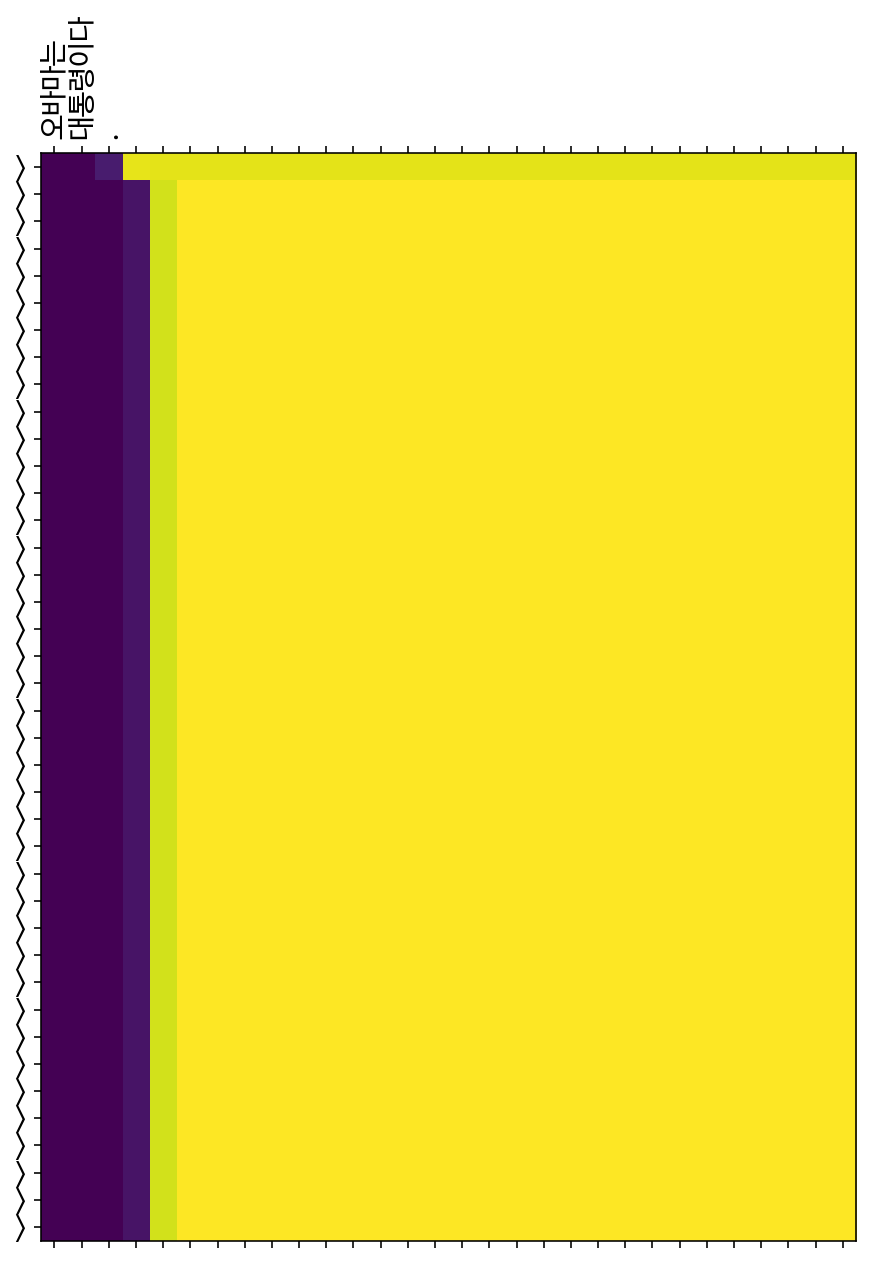

입력: 시민들은 도시 속에 산다 .
번역: > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > 


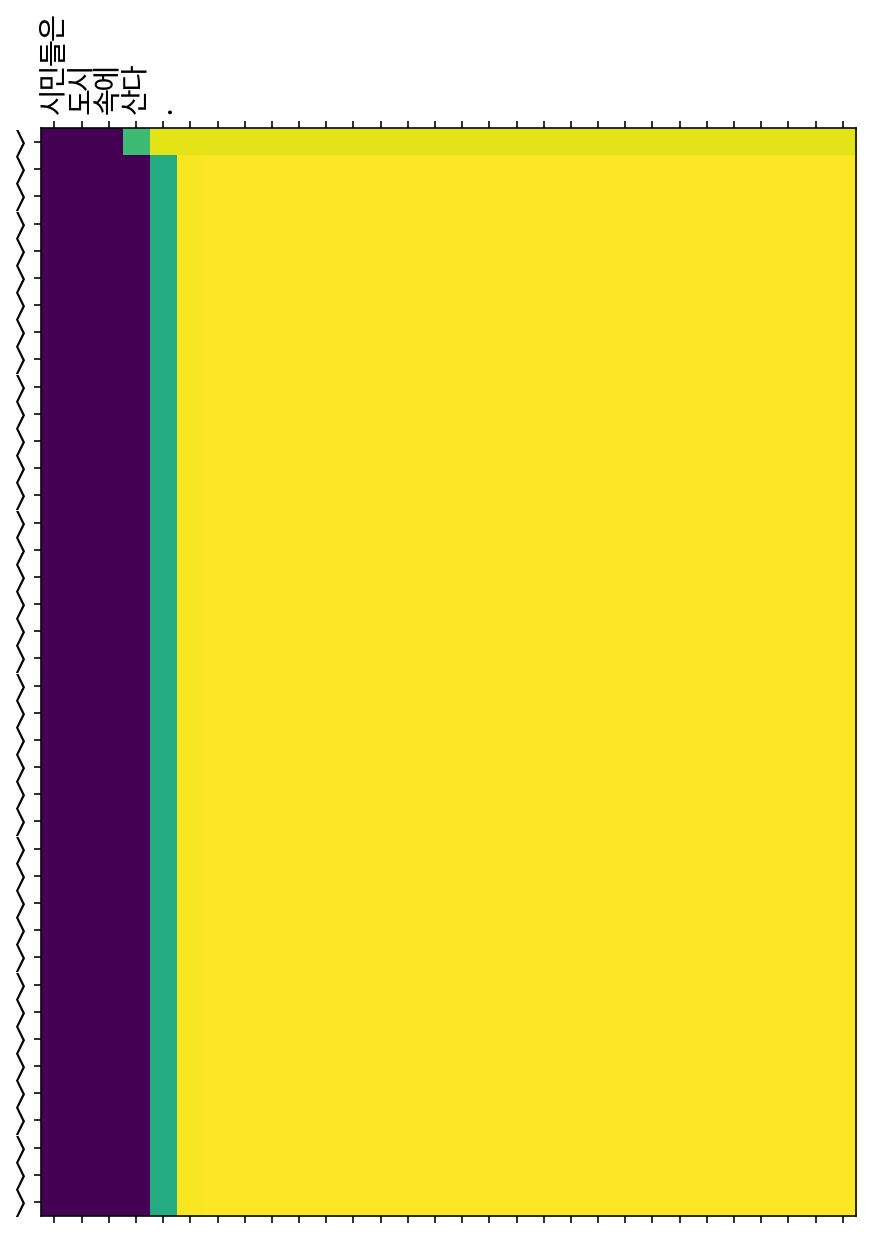

입력: 커피는 필요 없다 .
번역: > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > 


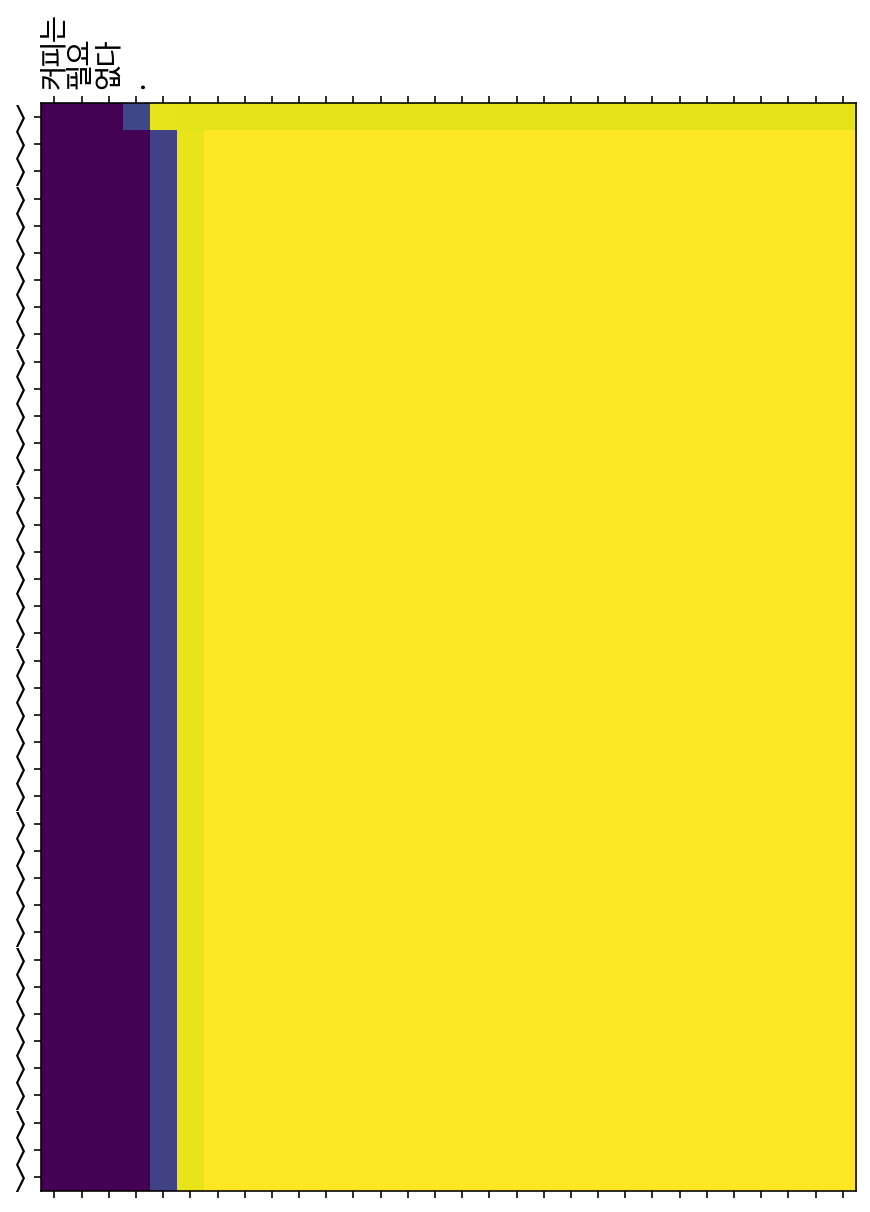

입력: 일곱 명의 사망자가 발생했다 .
번역: > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > 


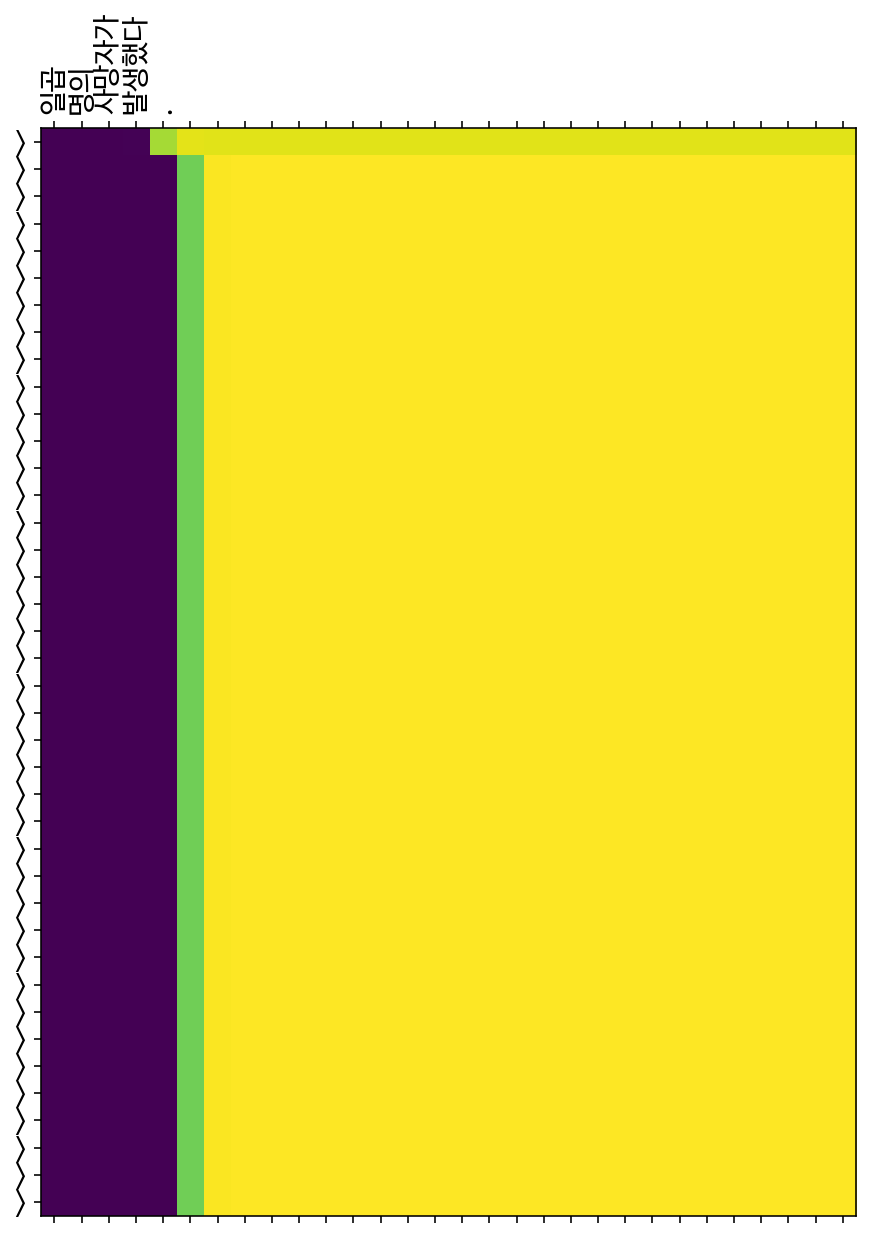

In [34]:

def translate(sentence, encoder, decoder):
    result, proc_sentence, attention = evaluate(sentence, encoder, decoder)
    print("입력:", proc_sentence)
    print("번역:", result)
    plot_attention(attention, proc_sentence, result)

############################################
# 테스트: 주어진 예문으로 번역 결과 확인
############################################
input_sentences = [
    "오바마는 대통령이다.",
    "시민들은 도시 속에 산다.",
    "커피는 필요 없다.",
    "일곱 명의 사망자가 발생했다."
]

for sent in input_sentences:
    translate(sent, encoder, decoder) 

## 회고


 Attention 기반의 Seq2Seq 번역기를 직접 구현하며 모델의 구조와 동작을 이해할 수 있어야 하는 프로젝트 였지만, 생각보다 원 데이터가 별로라서 성능이 나오지 않았다. 팀원들과 전처리 전/후, 적절패딩/풀패딩 으로 나눠서 했는데 결과적으로 적절패딩으로 한 번역들은 번역이 아예 되지 않았음.
풀패딩으로 한 번역들은 번역 성능이 어느정도 되었음
3만개 샘플, BATCH_SIZE = 32, units = 512, embedding_dim = 256 을 사용했는데 더 샘플을 많이 사용했으면 어땠을까 싶음 

